Matplotlib is building the font cache; this may take a moment.


--- Task 1: Load and Inspect Data ---

First 5 rows of the dataset:
   Age  Sex ChestPainType  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1   63    1       typical     145   233    1        2    150      0      2.3   
2   67    1  asymptomatic     160   286    0        2    108      1      1.5   
3   67    1  asymptomatic     120   229    0        2    129      1      2.6   
4   37    1    nonanginal     130   250    0        0    187      0      3.5   
5   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal Target  
1      3  0.0       fixed     No  
2      2  3.0      normal    Yes  
3      2  2.0  reversable    Yes  
4      3  0.0      normal     No  
5      1  0.0      normal     No  

Dataset Information (dtypes, non-null counts):
<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   

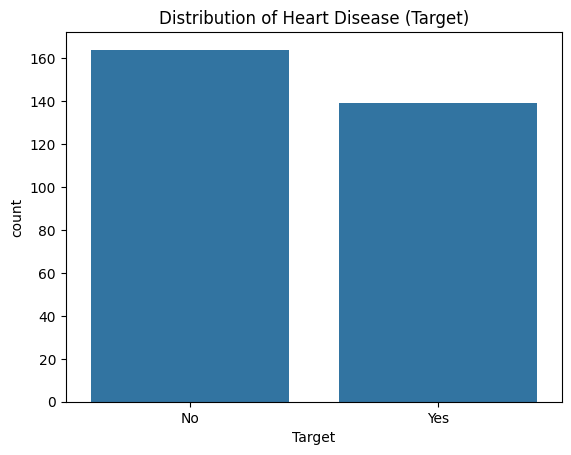


--- Task 2: Data Cleaning and Preprocessing ---

Checking for missing values ('NA'):
Age              0
Sex              0
ChestPainType    0
RestBP           0
Chol             0
Fbs              0
RestECG          0
MaxHR            0
ExAng            0
Oldpeak          0
Slope            0
Ca               0
Thal             0
Target           0
dtype: int64

Imputed missing 'Ca' values with median: 0.0
Imputed missing 'Thal' values with mode: normal

Missing values after imputation:
Age              0
Sex              0
ChestPainType    0
RestBP           0
Chol             0
Fbs              0
RestECG          0
MaxHR            0
ExAng            0
Oldpeak          0
Slope            0
Ca               0
Thal             0
Target           0
dtype: int64

Converted 'Target' variable to 1 (Yes) / 0 (No).

Applying One-Hot Encoding to: ['ChestPainType', 'Thal']

Dataset after cleaning and encoding (first 5 rows):
   Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slop

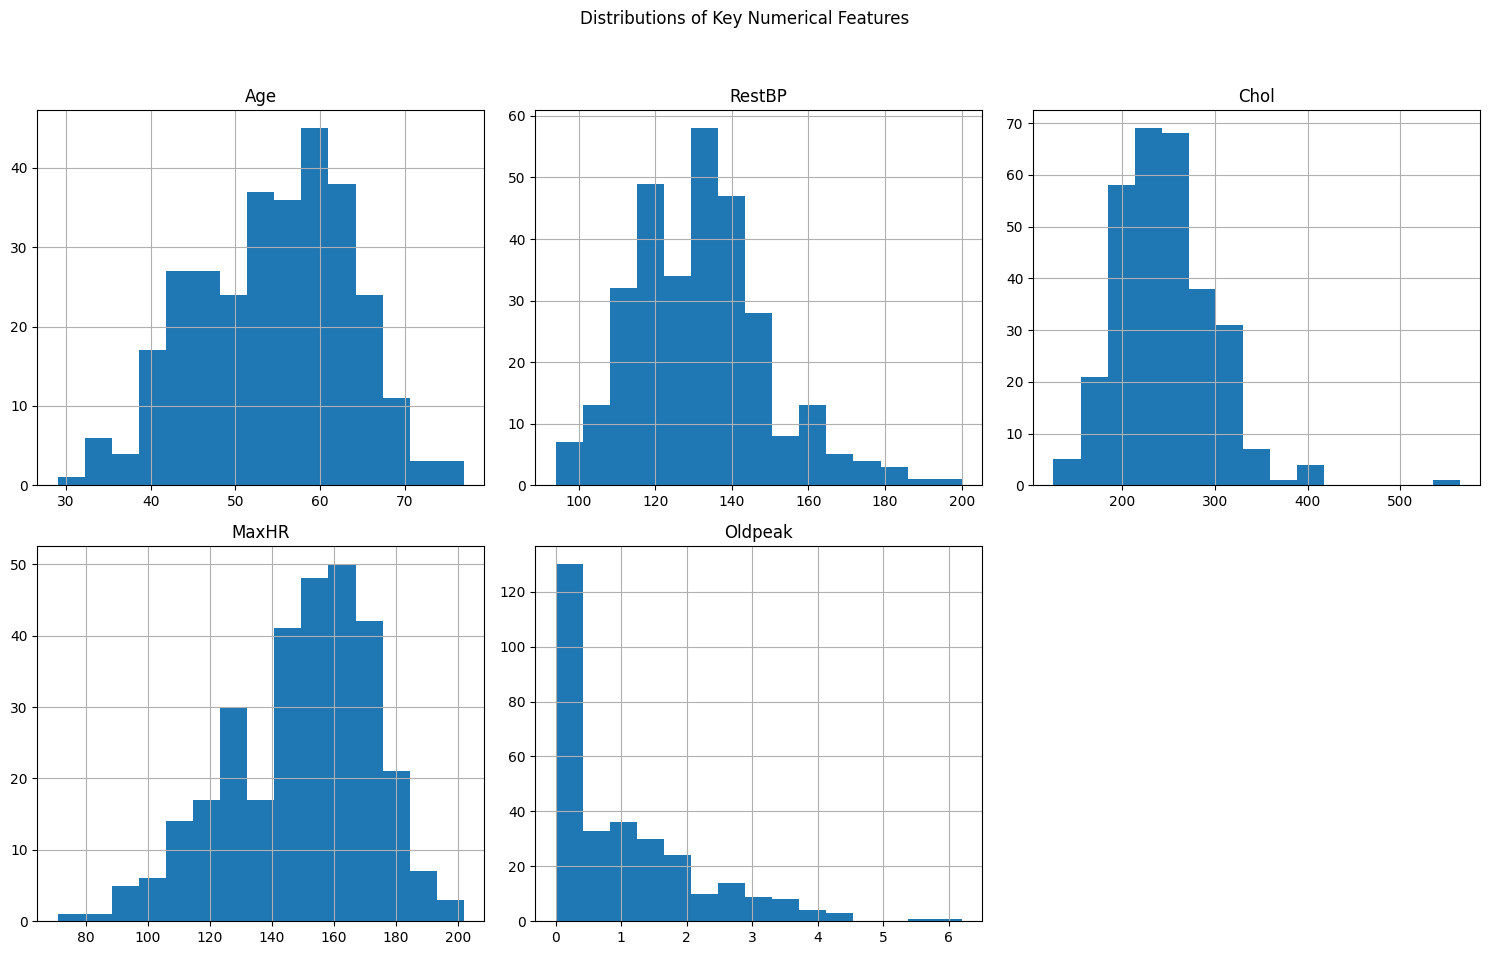


Plotting relationships between features and Target variable...


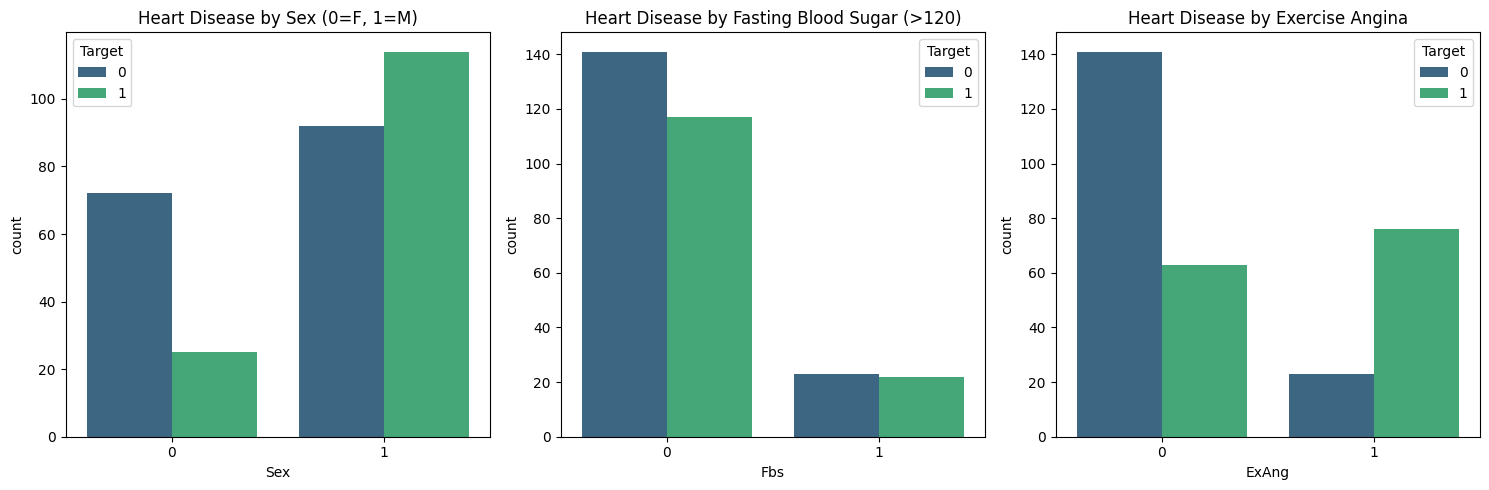

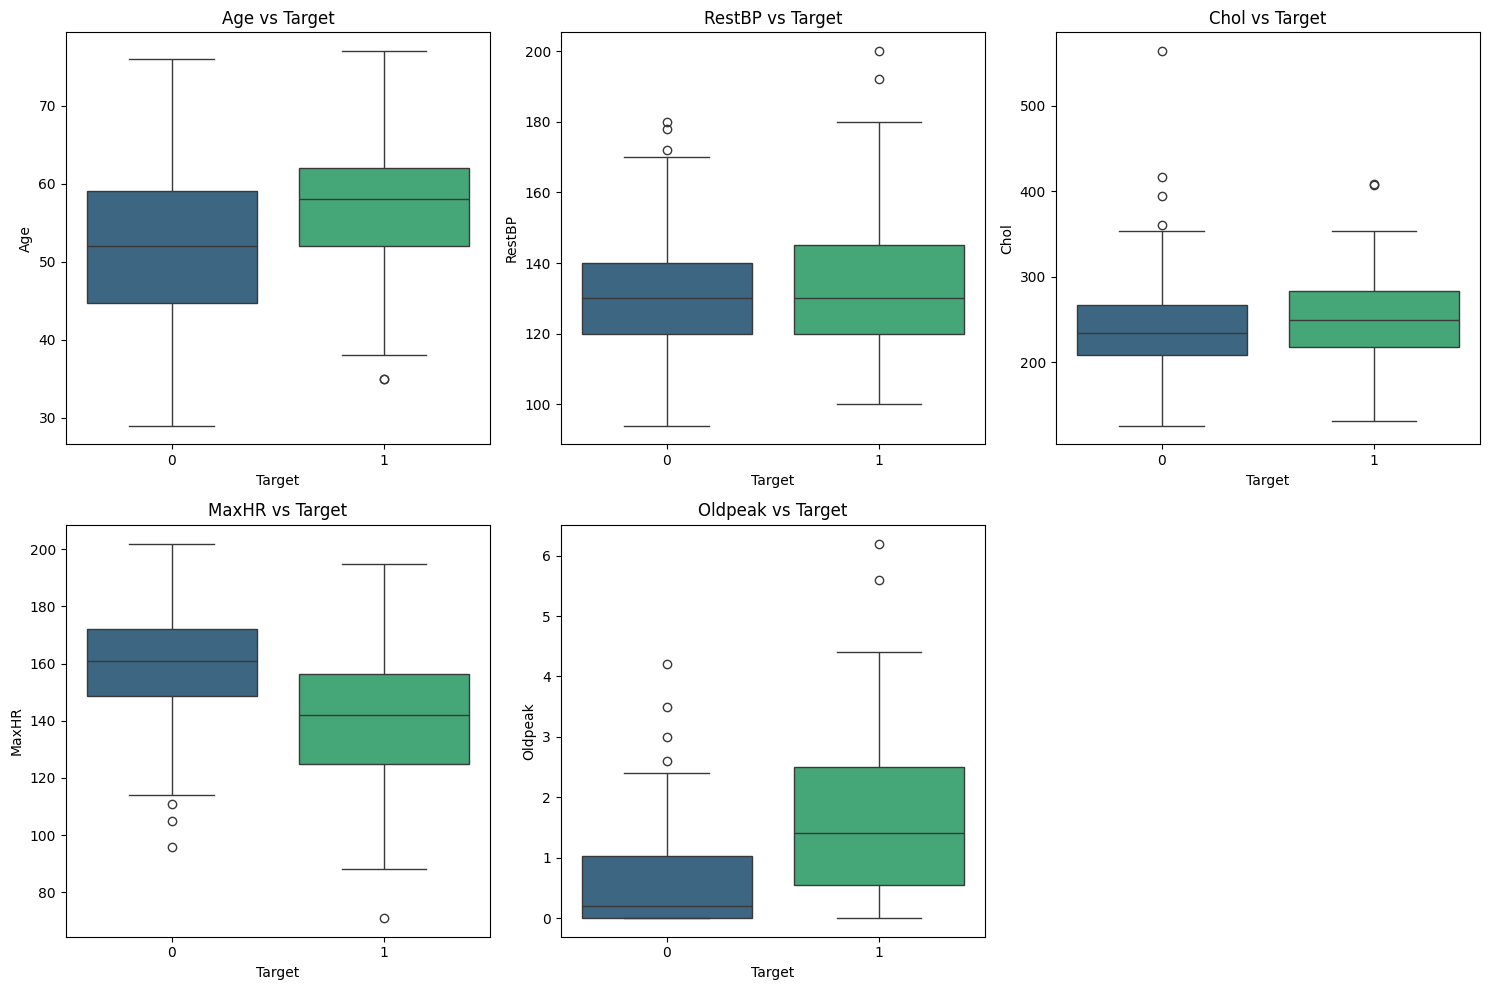


Calculating and plotting correlation matrix...


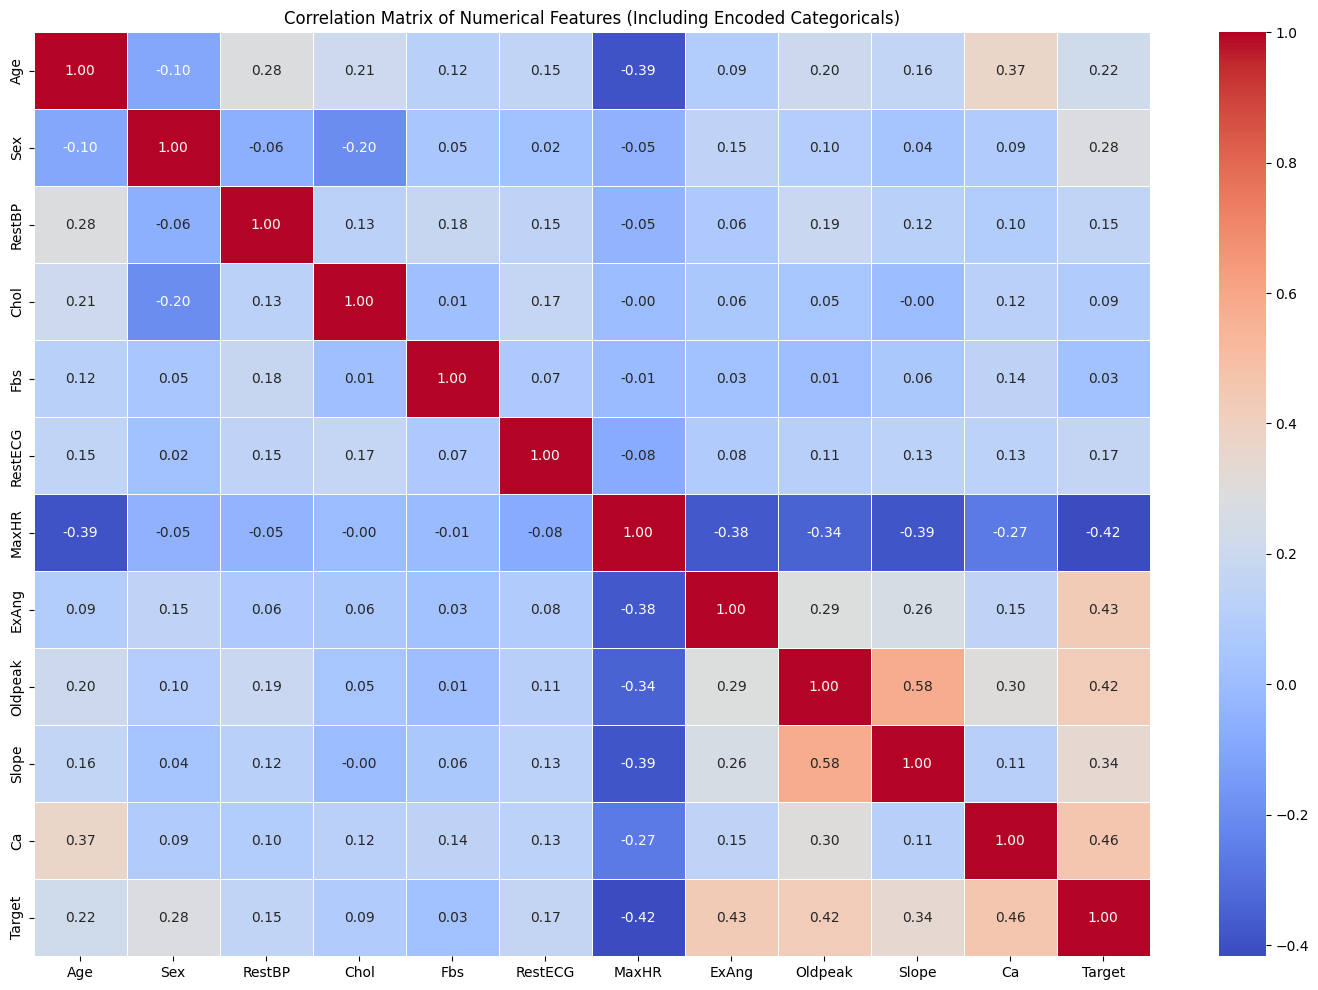


--- Task 4: Aggregation and Insights ---

Heart Disease Rate by Gender:
Sex
0    0.257732
1    0.553398
Name: Target, dtype: float64

Heart Disease Rate by Chest Pain Type:
ChestPainType
asymptomatic    0.729167
typical         0.304348
nonanginal      0.209302
nontypical      0.180000
Name: Target, dtype: float64

Heart Disease Rate by Max Heart Rate (Binned):
MaxHR_Bin
(70.869, 97.2]    0.857143
(97.2, 123.4]     0.702703
(123.4, 149.6]    0.647727
(149.6, 175.8]    0.328571
(175.8, 202.0]    0.129032
Name: Target, dtype: float64

Average Cholesterol Levels by Heart Disease Status:
Target
0    242.640244
1    251.474820
Name: Chol, dtype: float64

Average Cholesterol Levels by Heart Disease Status and Chest Pain Type:
ChestPainType  Target
asymptomatic   0         245.333333
               1         252.438095
nonanginal     0         245.279412
               1         239.000000
nontypical     0         240.682927
               1         263.444444
typical        0         229.87

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# --- Task 1: Load and Inspect the Data ---
print("--- Task 1: Load and Inspect Data ---")

# Define the path to your data file
file_path = 'heart.txt' 

try:
    # Load the dataset - skipping the first column (index), handling quotes
    # Need to specify the separator and potentially handle the quotes if they cause issues.
    # The header is row 0, index_col=0 skips the first unnamed column.
    df = pd.read_csv(file_path, index_col=0)

    # Rename columns for easier access (remove potential leading/trailing spaces if any)
    df.columns = df.columns.str.strip()
    
    # Rename 'AHD' to 'Target' to match PDF, 'ChestPain' to 'ChestPainType'
    df.rename(columns={'AHD': 'Target', 'ChestPain': 'ChestPainType'}, inplace=True)

    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nDataset Information (dtypes, non-null counts):")
    df.info()

    print("\nStatistical Summary of Numerical Features:")
    print(df.describe())

    print("\nDistribution of the Target variable (Heart Disease):")
    print(df['Target'].value_counts(normalize=True)) # Use normalize=True for proportions
    sns.countplot(x='Target', data=df)
    plt.title('Distribution of Heart Disease (Target)')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure 'heart.txt' is in the same directory as the script.")
    exit()
except Exception as e:
    print(f"An error occurred while loading or initially inspecting the data: {e}")
    exit()

# --- Task 2: Data Cleaning and Preprocessing ---
print("\n--- Task 2: Data Cleaning and Preprocessing ---")

# Handle Missing Data ('NA' values)
print("\nChecking for missing values ('NA'):")
print(df.isin(['NA']).sum())

# Replace 'NA' strings with NaN (Not a Number) for proper handling
df.replace('NA', np.nan, inplace=True)

# Convert columns with potential NaNs to numeric where appropriate, coercing errors
# 'Ca' and 'Thal' are the ones identified with 'NA'
df['Ca'] = pd.to_numeric(df['Ca'], errors='coerce')
# Thal is categorical, leave as object for now, will impute later

# Impute missing values
# For 'Ca' (numerical), use the median
ca_median = df['Ca'].median()
df['Ca'].fillna(ca_median, inplace=True)
print(f"\nImputed missing 'Ca' values with median: {ca_median}")

# For 'Thal' (categorical), use the mode
thal_mode = df['Thal'].mode()[0] 
df['Thal'].fillna(thal_mode, inplace=True)
print(f"Imputed missing 'Thal' values with mode: {thal_mode}")

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Feature Engineering
# Convert Target 'Yes'/'No' to 1/0
df['Target'] = df['Target'].map({'Yes': 1, 'No': 0})
print("\nConverted 'Target' variable to 1 (Yes) / 0 (No).")

# Convert Categorical variables using One-Hot Encoding
# Selecting categorical columns (object type) excluding 'Target' if it was object
categorical_cols = df.select_dtypes(include='object').columns
print(f"\nApplying One-Hot Encoding to: {list(categorical_cols)}")
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

# Optional: Normalize/Standardize numerical features (Example using StandardScaler)
# Uncomment the following lines if normalization is needed for specific models
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numerical_cols = df.select_dtypes(include=np.number).columns.drop('Target') # Exclude target
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# print("\nApplied StandardScaler to numerical features.")

print("\nDataset after cleaning and encoding (first 5 rows):")
print(df.head())
print("\nDataset info after preprocessing:")
df.info() # Check final types

# --- Task 3: Exploratory Data Analysis (EDA) ---
print("\n--- Task 3: Exploratory Data Analysis ---")

# Univariate Analysis (Numerical Features)
numerical_features = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak'] 
print(f"\nPlotting distributions for numerical features: {numerical_features}")
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distributions of Key Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Bivariate Analysis
print("\nPlotting relationships between features and Target variable...")

# Categorical Features (Original ones before encoding) vs Target
original_categorical = ['Sex', 'Fbs', 'ExAng'] # Already 0/1 or simple categories
# Add encoded features representation if needed, e.g. ChestPain types
# For ChestPainType, Thal (now encoded), RestECG (if kept numerical or encoded)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', hue='Target', data=df, palette='viridis')
plt.title('Heart Disease by Sex (0=F, 1=M)')

plt.subplot(1, 3, 2)
sns.countplot(x='Fbs', hue='Target', data=df, palette='viridis')
plt.title('Heart Disease by Fasting Blood Sugar (>120)')

plt.subplot(1, 3, 3)
sns.countplot(x='ExAng', hue='Target', data=df, palette='viridis')
plt.title('Heart Disease by Exercise Angina')
plt.tight_layout()
plt.show()

# Include plots for the newly one-hot encoded features vs Target if desired
# Example for Chest Pain types (requires mapping encoded columns back or careful plotting)
# Example for Thalium Stress Test result types

# Numerical Features vs Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Target', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

# Correlation Matrix
print("\nCalculating and plotting correlation matrix...")
plt.figure(figsize=(18, 12))
# Calculate correlation only on numerical columns
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Including Encoded Categoricals)')
plt.show()


# --- Task 4: Aggregation and Insights ---
print("\n--- Task 4: Aggregation and Insights ---")

# Reload original data for easier aggregation on original categories before encoding
# Or map encoded columns back carefully
df_orig = pd.read_csv(file_path, index_col=0)
df_orig.columns = df_orig.columns.str.strip()
df_orig.rename(columns={'AHD': 'Target', 'ChestPain': 'ChestPainType'}, inplace=True)
df_orig['Target'] = df_orig['Target'].map({'Yes': 1, 'No': 0})
# Handle NAs in original df for consistent grouping if necessary
df_orig.replace('NA', np.nan, inplace=True)
df_orig['Ca'] = pd.to_numeric(df_orig['Ca'], errors='coerce')
ca_median_orig = df_orig['Ca'].median()
df_orig['Ca'].fillna(ca_median_orig, inplace=True)
thal_mode_orig = df_orig['Thal'].mode()[0] 
df_orig['Thal'].fillna(thal_mode_orig, inplace=True)


print("\nHeart Disease Rate by Gender:")
print(df_orig.groupby('Sex')['Target'].mean()) # 0 = Female, 1 = Male

print("\nHeart Disease Rate by Chest Pain Type:")
print(df_orig.groupby('ChestPainType')['Target'].mean().sort_values(ascending=False))

# Heart Disease Rate by MaxHR (Example: binning MaxHR)
df_orig['MaxHR_Bin'] = pd.cut(df_orig['MaxHR'], bins=5) # Create 5 bins for MaxHR
print("\nHeart Disease Rate by Max Heart Rate (Binned):")
print(df_orig.groupby('MaxHR_Bin')['Target'].mean())

print("\nAverage Cholesterol Levels by Heart Disease Status:")
print(df_orig.groupby('Target')['Chol'].mean())

print("\nAverage Cholesterol Levels by Heart Disease Status and Chest Pain Type:")
print(df_orig.groupby(['ChestPainType', 'Target'])['Chol'].mean())


# --- Task 5: Derive Medical Insights ---
print("\n--- Task 5: Potential Medical Insights (Based on Analysis) ---")

# Note: These insights are based on the visualisations and aggregations above.
# Deeper statistical testing would be needed for confirmation.

insight1 = "- Higher rates of heart disease are observed in males (Sex=1) compared to females (Sex=0) in this dataset."
insight2 = "- Patients experiencing 'asymptomatic' chest pain have a significantly higher rate of heart disease compared to other types."
insight3 = "- The presence of exercise-induced angina (ExAng=1) is strongly associated with a higher likelihood of heart disease."
insight4 = "- Generally, patients with heart disease tend to have lower maximum heart rates (MaxHR) achieved during exercise."
insight5 = "- Higher 'Oldpeak' values (ST depression induced by exercise) correlate strongly with the presence of heart disease."
insight6 = "- Specific Thallium scan results (e.g., 'reversable' defect, based on encoded feature correlations) are associated with higher heart disease rates."
insight7 = "- While average cholesterol ('Chol') is often considered a risk factor, its distribution between patients with and without heart disease in this dataset might overlap significantly (check boxplots), suggesting other factors are also critical."

print(insight1)
print(insight2)
print(insight3)
print(insight4)
print(insight5)
print(insight6)
print(insight7)

print("\n--- Analysis Complete ---")
print("Note: Dashboard creation requires separate tools/libraries like Dash, Streamlit, Tableau, or Power BI.")